In [13]:
# Read data.
import os

# Folder containing all NIPS papers.
data_dir = 'nipstxt/'

# Folders containin individual NIPS papers.
yrs = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
dirs = ['nips' + yr for yr in yrs]

# Read all texts into a list.
docs = []
for yr_dir in dirs:
    files = os.listdir(data_dir + yr_dir)
    for filen in files:
        # Note: ignoring characters that cause encoding errors.
        with open(data_dir + yr_dir + '/' + filen, 'r') as fid:
            txt = fid.read()
        docs.append(txt)

In [14]:
text = docs
# Tokenize the documents.

from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

In [15]:
# Lemmatize the documents.

from nltk.stem.wordnet import WordNetLemmatizer

# Lemmatize all words in documents.
lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]


# Compute bigrams.

from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
            
# Remove rare and common tokens.

from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Vectorize data.

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

C:\Users\Jithin\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Number of unique tokens: 8641
Number of documents: 1740


In [16]:
# Train LDA model.

from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

Wall time: 2min 18s


In [18]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      17.534142        1       1  0.180372 -0.071277
2      11.908624        1       2  0.029353  0.120669
7      11.160672        1       3 -0.103023 -0.019657
5       9.785279        1       4  0.090029  0.036548
1       9.472101        1       5  0.045228  0.036242
9       9.344021        1       6 -0.026403 -0.090589
6       9.053735        1       7 -0.090886  0.021365
3       8.516845        1       8 -0.059188 -0.038401
8       8.194843        1       9 -0.019607 -0.004919
4       5.029732        1      10 -0.045876  0.010018, topic_info=     Category         Freq            Term        Total  loglift  logprob
term                                                                     
68    Default  5872.000000            cell  5872.000000  30.0000  30.0000
1657  Default  6760.000000           image  6760.000000  29.0000  29.0000
242   Default  8290.000000          neuron  8290.000000  28.0000  28.0000
253   Default  3212.000000          object  3212.000000  27.0000  27.0000
1822  Default  2639.000000          speech  2639.000000  26.0000  26.0000
3002  Default  2488.000000          action  2488.000000  25.0000  25.0000
1401  Default  4453.000000     recognition  4453.000000  24.0000  24.0000
2796  Default  2709.000000        stimulus  2709.000000  23.0000  23.0000
519   Default  1732.000000            chip  1732.000000  22.0000  22.0000
400   Default  2779.000000            word  2779.000000  21.0000  21.0000
5874  Default  1500.000000          policy  1500.000000  20.0000  20.0000
5939  Default  2413.000000         mixture  2413.000000  19.0000  19.0000
1245  Default  4941.000000           class  4941.000000  18.0000  18.0000
573   Default  4045.000000         control  4045.000000  17.0000  17.0000
1825  Default  2090.000000           spike  2090.000000  16.0000  16.0000
741   Default  5788.000000          hidden  5788.000000  15.0000  15.0000
1296  Default  1215.000000            face  1215.000000  14.0000  14.0000
970   Default  1293.000000   reinforcement  1293.000000  13.0000  13.0000
70    Default  2539.000000         circuit  2539.000000  12.0000  12.0000
391   Default  3261.000000          visual  3261.000000  11.0000  11.0000
832   Default  3180.000000          memory  3180.000000  10.0000  10.0000
1645  Default  2750.000000  generalization  2750.000000   9.0000   9.0000
2428  Default  1992.000000      likelihood  1992.000000   8.0000   8.0000
3478  Default  2636.000000      classifier  2636.000000   7.0000   7.0000
26    Default  1838.000000          analog  1838.000000   6.0000   6.0000
712   Default  3360.000000        gaussian  3360.000000   5.0000   5.0000
3074  Default  1582.000000          firing  1582.000000   4.0000   4.0000
1976  Default  1531.000000          cortex  1531.000000   3.0000   3.0000
58    Default  2524.000000           bound  2524.000000   2.0000   2.0000
726   Default  2848.000000        gradient  2848.000000   1.0000   1.0000
...       ...          ...             ...          ...      ...      ...
6855  Topic10    26.844913           yi_xi    48.784180   2.3925  -8.2509
3606  Topic10   433.547119      similarity   819.390869   2.3532  -5.4689
5159  Topic10    86.573036        lagrange   162.380157   2.3609  -7.0799
1673  Topic10   628.492920          kernel  1497.012207   2.1219  -5.0976
6372  Topic10   292.817322             pca   638.839355   2.2097  -5.8614
4342  Topic10   486.964508            loss  1178.984497   2.1056  -5.3527
1086  Topic10   479.806885         support  1250.714355   2.0317  -5.3675
5157  Topic10   196.242371      invariance   440.090454   2.1822  -6.2616
2599  Topic10   715.773987        distance  2598.188232   1.7006  -4.9676
2203  Topic10   247.947891           query   652.694458   2.0219  -6.0277
2821  Topic10   413.403442  transformation  1387.333008   1.7791  -5.5165
5240  Topic10   173.611023          convex   414.1376

In [19]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.5912,"class, bound, classifier, rule, let, theorem, ...","[1, connectivity, versus, entropy, yaser, s, a..."
1,1,5.0,0.6954,"neuron, memory, chip, layer, analog, circuit, ...","[9, stochastic, learning, networks, and, their..."
2,2,4.0,0.2847,"image, face, distance, kernel, class, loss, ta...","[22, learning, on, a, general, network, amir, ..."
3,3,9.0,0.3017,"noise, matrix, dynamic, signal, field, gaussia...","[31, an, artificial, neural, network, for, spa..."
4,4,6.0,0.3884,"class, bound, classifier, rule, let, theorem, ...","[41, on, properties, of, networks, of, neuron,..."
5,5,3.0,0.3768,"hidden, generalization, gradient, hidden_unit,...","[52, supervised, learning, of, probability, di..."
6,6,0.0,0.9123,"cell, neuron, response, stimulus, visual, acti...","[62, centric, models, of, the, orientation, ma..."
7,7,3.0,0.8566,"hidden, generalization, gradient, hidden_unit,...","[72, analysis, and, comparison, of, different,..."
8,8,0.0,0.9998,"cell, neuron, response, stimulus, visual, acti...","[82, simulations, suggest, information, proces..."
9,9,0.0,0.5723,"cell, neuron, response, stimulus, visual, acti...","[95, optimal, neural, spike, classification, a..."


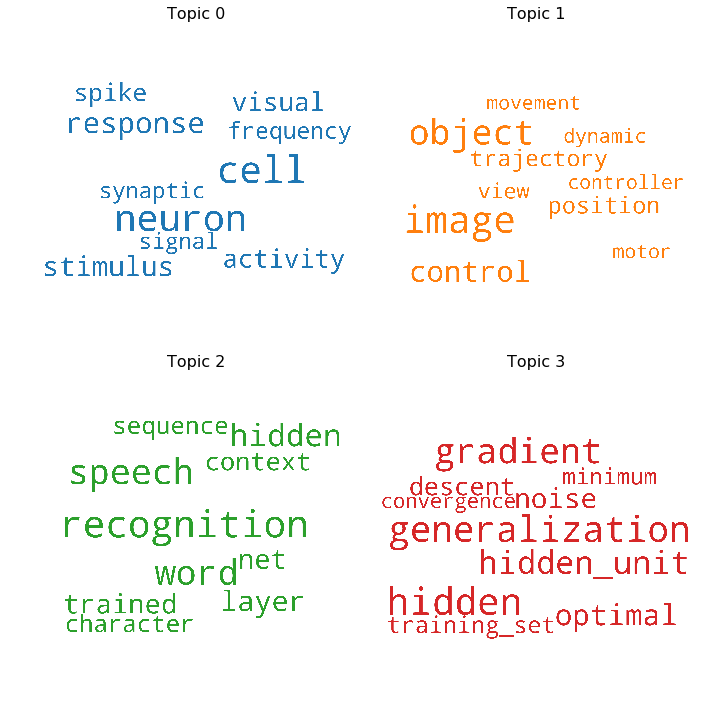

In [30]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

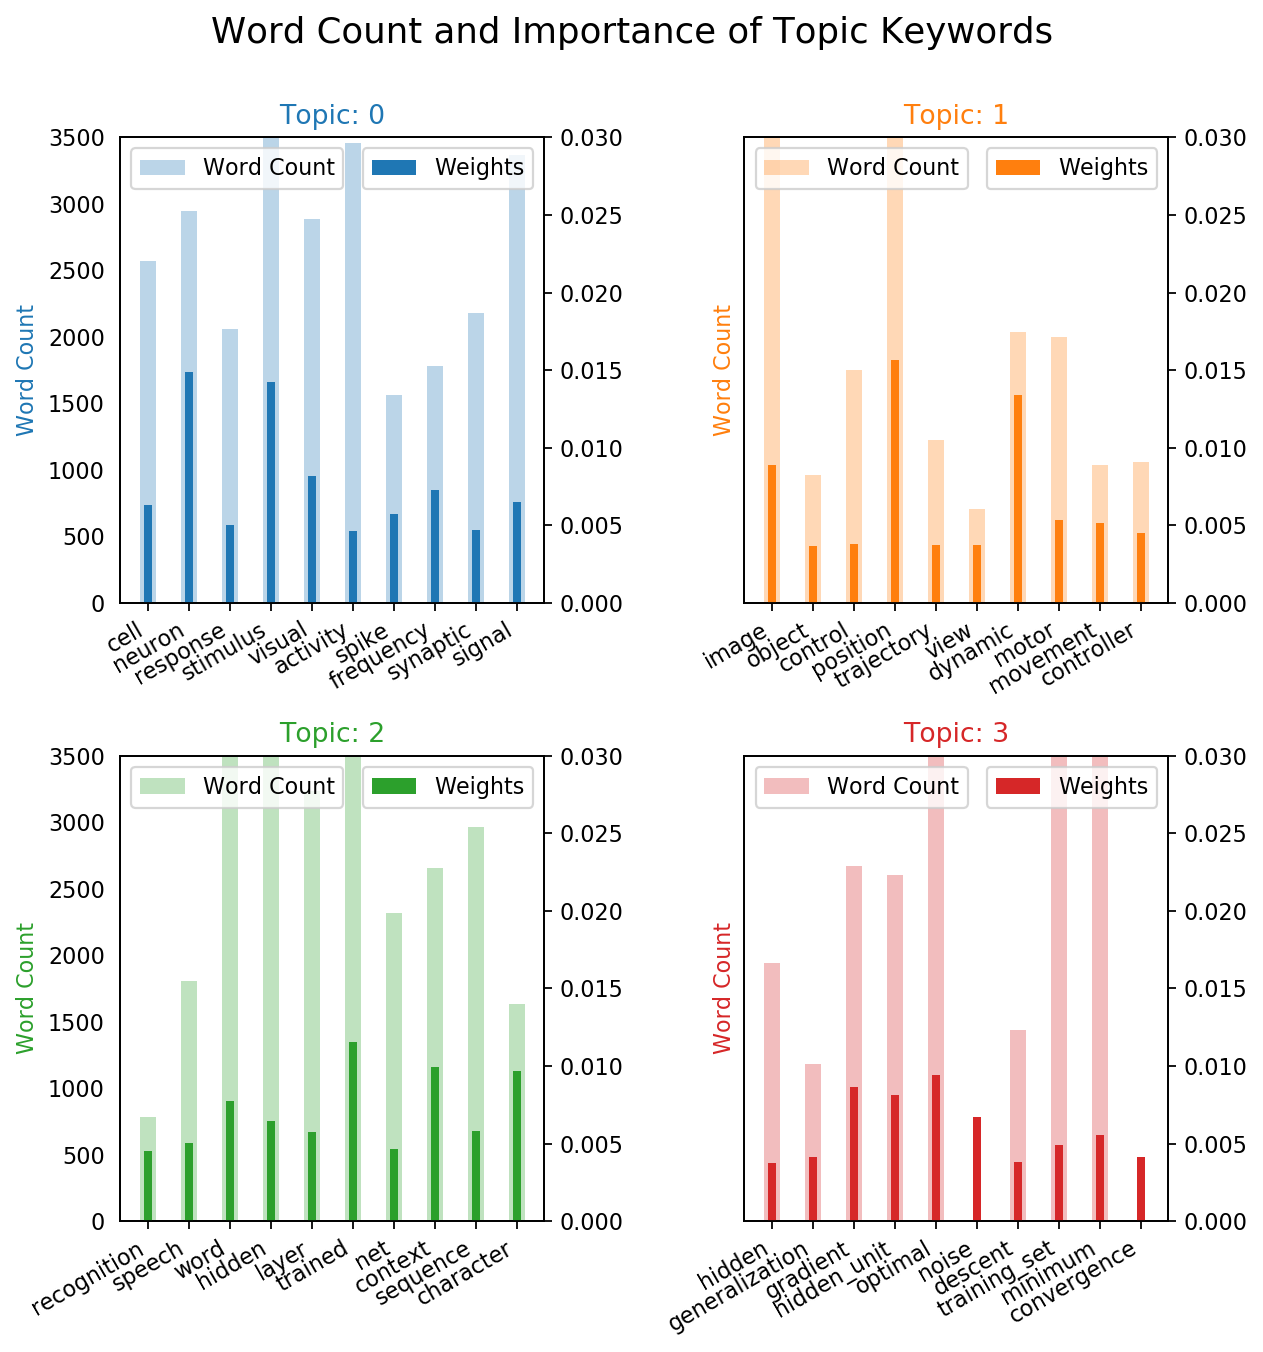

In [45]:
from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in text for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(8,8), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.4, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=12)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=16, y=1.05)    
plt.show()

In [60]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(model[corpus]):
    #print(row_list)
    topic_weights.append([w for i, w in row_list])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1669 samples in 0.001s...
[t-SNE] Computed neighbors for 1669 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1669
[t-SNE] Computed conditional probabilities for sample 1669 / 1669
[t-SNE] Mean sigma: 0.000033
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.320484
[t-SNE] Error after 1000 iterations: 0.517913


Loading BokehJS ...